# `(i): 💻 Smart Laptop Buying: A Data-Driven Guide `

### 🎯 Project Type: Exploratory Data Analysis | Feature Engineering | Machine Learning | Recommendation System  
 



📈 This project aims to explore what makes a laptop worth its price — and how consumers can make better laptop-buying decisions using data.

We’ll answer:
- What features drive laptop prices?
- Which brands offer better value?
- Can we predict price from specs?
- Can we recommend the best laptops under a given budget?

---


---

## `(ii): Dataset Overview `

The dataset is sourced from **Kaggle** and contains **4,446 laptop listings** from various manufacturers. It includes comprehensive technical specifications, visual/aesthetic details, and customer ratings — enabling an in-depth analysis of pricing trends, value-for-money, and optimal purchase decisions.

- **Dataset URL:** [Laptop Prices Dataset (October 2023)](https://www.kaggle.com/datasets/talhabarkaatahmad/laptop-prices-dataset-october-2023/data)

---

### 🧾 Description of Key Attributes

| Attribute              | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| **Brand**              | Manufacturer (e.g., HP, Apple) — brand trust and price trends              |
| **Model**              | Specific model identifier                                                   |
| **Screen size**        | Physical screen size (in inches) — portability vs. workspace               |
| **Color**              | Aesthetic preference (e.g., Black, Silver)                                  |
| **Hard disk**          | Storage capacity (e.g., 512GB, 1TB) — affects performance and cost          |
| **CPU**                | Processor model/type (e.g., Intel i5) — major factor in performance         |
| **RAM**                | Working memory (e.g., 8GB, 16GB) — affects multitasking and speed          |
| **OS**                 | Operating system (Windows, macOS, Linux)                                    |
| **Special features**   | Unique value-adding features (e.g., Fingerprint Sensor, Backlit Keyboard)   |
| **Graphics**           | Graphics card type (Integrated vs Dedicated)                                |
| **Graphics coprocessor** | Specific GPU model or chip                                                |
| **CPU speed**          | Processor speed in GHz — numerical performance indicator                   |
| **Rating**             | Customer satisfaction (scale of 1 to 5)                                     |
| **Price**              | Final retail price — the primary target variable                            |



✅ This mix of **performance, aesthetic, and user feedback variables** makes the dataset ideal for building a recommendation engine, price predictor, and brand comparison model.

---
---


# `(iii): Load and Inspect Data `

Importing Neccassary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('amazon_laptop_prices_v01.csv')

print(30 * '-', 'Dataset', 30 * '-')
print(df.head(5))
print('\n')

print(30 * '-', 'Info', 30 * '-')
print(df.info())
print('\n')

print(30 * '-', 'Null Values', 30 * '-')
print(df.isna().sum())
print('Total Null Values: ', df.isna().sum().sum())
print('\n')

------------------------------ Dataset ------------------------------
   brand                  model   screen_size       color harddisk  \
0   ROKC                    NaN     14 Inches        Blue  1000 GB   
1     HP                    NaN   15.6 Inches      Silver  1000 GB   
2    MSI  Vector GP66 12UGS-267  15.66 Inches  Core Black      NaN   
3  Apple            MacBook Air   13.3 Inches      Silver   256 GB   
4  Apple            MacBook Air   15.3 Inches    Midnight   256 GB   

             cpu    ram               OS  special_features    graphics  \
0  Intel Core i7   8 GB       Windows 11               NaN  Integrated   
1  Intel Core i5  64 GB   Windows 11 Pro  Backlit Keyboard  Integrated   
2  Intel Core i9  32 GB  Windows 11 Home               NaN   Dedicated   
3        Unknown   8 GB           Mac OS  Backlit Keyboard  Integrated   
4        Unknown   8 GB           Mac OS               NaN  Integrated   

  graphics_coprocessor cpu_speed  rating       price  
0        

**Observation:** infact the data in not clean, datatypes need to be fixed, and duplicacy and null values need to be dealt with

# `(iii): Data Cleaning `

## 1. `'brand'`

--> **Null Values Check**

In [3]:
print("Total Null Values in 'brand': ",df['brand'].isna().sum())

Total Null Values in 'brand':  0


--> **Unique Values Check**

In [4]:
print(df['brand'].unique())
print(f"\nTotal Unique Brands: {df['brand'].nunique()}")

['ROKC' 'HP' 'MSI' 'Apple' 'Acer' 'ASUS' 'acer' 'Gateway' 'Lenovo' 'DELL'
 'Dell' 'LG' 'Microsoft' 'SAMSUNG' 'Carlisle FoodService Products'
 'Gigabyte' 'Razer' 'Asus' 'LENOVO' 'Panasonic' 'Toughbook' 'Corsair'
 'Alienware' 'AWOW' 'Quality Refurbished Computers' 'dell' 'IVIEW' 'hp'
 'XPG' 'Computer Upgrade King' 'CTL' 'Best Notebooks' 'LPT' 'Goldengulf'
 'lenovo' 'ONN' 'Latitude' 'VAIO' 'Luqeeg' 'MICROTELLA' 'Elo' 'SHOXLAB'
 'GizPro' 'MAINGEAR' 'Tocosy' 'asus' 'XAMMUE' 'JTD' 'Mytrix' 'TOPOSH']

Total Unique Brands: 50


In [5]:
print(df['brand'].value_counts())

brand
Dell                             1581
HP                                804
ROKC                              637
MSI                               473
Lenovo                            308
ASUS                              160
DELL                              147
acer                              108
LG                                 39
Apple                              29
SAMSUNG                            23
Microsoft                          15
Alienware                          14
Panasonic                          12
Gigabyte                           11
Toughbook                          11
Acer                               11
Razer                               6
hp                                  6
LENOVO                              6
lenovo                              4
Latitude                            3
Luqeeg                              3
Computer Upgrade King               2
Gateway                             2
Asus                                2
SHOXLA

---

`Observation:`
The brand column had 50 unique values, many of which were duplicates due to:
- Inconsistent casing (e.g., "Dell", "DELL", "dell")
- Misspellings or alternate names (e.g., "asus", "Asus", "ASUS")
- Rare or irrelevant entries (e.g., "Carlisle FoodService Products", "Luqeeg", etc)
- Model lineups mistakenly treated as brands (e.g., "Toughbook" --> Panasonic and "Latitude" --> Dell)
- 'ROKC' is a major chunk of the data, upon researching it on amazon and also looking into the discussion section of the dataset on kaggle we will have come to a conclusion that these will be considered as 'lenovo' laptops.

`Approach:`
- Lowercase all the brand names
- Mapped known aliases to standardized brand names (Toughbook is a Panasonic series, Latitude is a Dell product line)
- brands having laptops fewer than 10 to fall under the **other** category


In [6]:
# lower case standarisation
df['brand'] = df['brand'].str.lower()
print('brand lowercase standardised: ', df['brand'].value_counts(), "\n")

# Mapping known series to brands
df['brand'] = df['brand'].replace({
    'toughbook':'Panasonic',
    'latitude':'dell',
    'rokc' : 'lenovo'
})

# brands count < 10 mapped to 'other'
brand_counts = df['brand'].value_counts()
rare_brands = brand_counts[brand_counts < 10].index
df['brand'] = df['brand'].apply(lambda x: 'other' if x in rare_brands else x)

# reset to tile case
df['brand'] = df['brand'].str.title()

print(50*'-')
print("Unique brands after cleaning:", df['brand'].nunique(), "\n")
print(df['brand'].value_counts())

brand lowercase standardised:  brand
dell                             1730
hp                                810
rokc                              637
msi                               473
lenovo                            318
asus                              163
acer                              119
lg                                 39
apple                              29
samsung                            23
microsoft                          15
alienware                          14
panasonic                          12
toughbook                          11
gigabyte                           11
razer                               6
luqeeg                              3
latitude                            3
gateway                             2
computer upgrade king               2
ctl                                 2
quality refurbished computers       2
iview                               2
shoxlab                             2
corsair                             1
carlisle food

### Brand Distribution

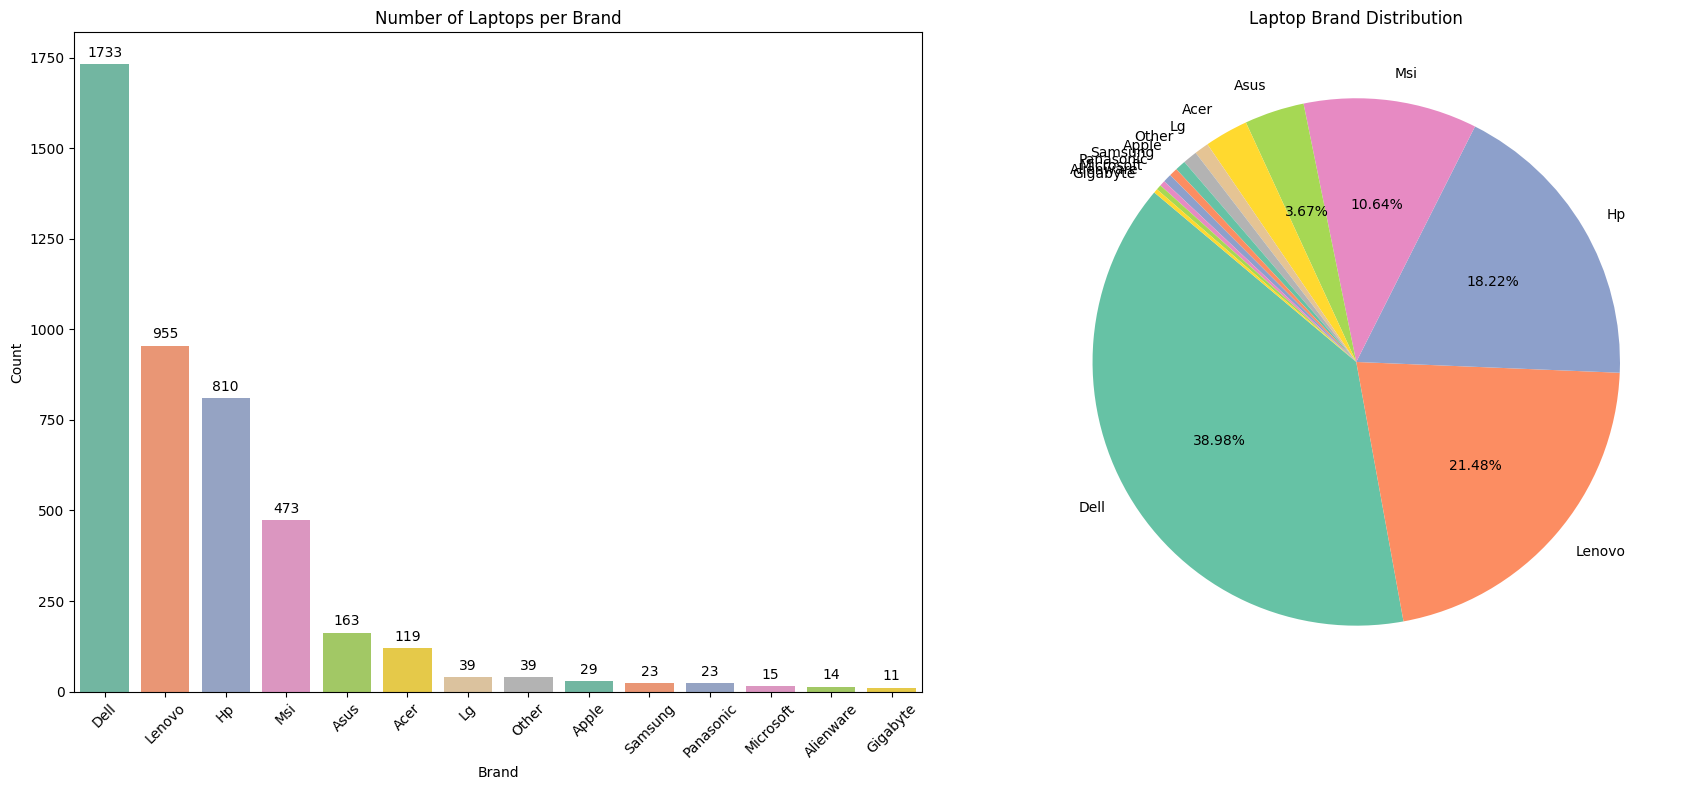

In [7]:
brands = df['brand'].value_counts().index.tolist()
colors = sns.color_palette('Set2', n_colors=len(brands))
brand_color_dict = dict(zip(brands, colors))

fig, axes = plt.subplots(1, 2, figsize=(18,8))


bar_ax = sns.countplot(data=df, x='brand', order=brands, hue='brand', ax=axes[0], palette=brand_color_dict ,legend=False)
bar_ax.set_title("Number of Laptops per Brand")
bar_ax.set_xlabel("Brand")
bar_ax.set_ylabel("Count")
bar_ax.tick_params(axis='x', rotation=45)

# Add count labels on top of each bar
for container in bar_ax.containers:
    bar_ax.bar_label(container, label_type='edge', padding=3, fontsize=10)


brand_counts = df['brand'].value_counts()
axes[1].pie(brand_counts, labels=brand_counts.index, autopct=lambda pct: f'{pct:.2f}%' if pct > 3 else '', startangle=140, colors=colors)
axes[1].set_title("Laptop Brand Distribution")

plt.tight_layout()
plt.show()

## 2. `'price'`

--> **Null Values Check**

In [8]:
print("Total Null Values in 'price': ", df['price'].isna().sum())

Total Null Values in 'price':  5


--> **Unique Values Check**

In [9]:
print(df['price'].unique())
print(f"\nTotal Unique Brands: {df['price'].nunique()}")

['$589.99 ' '$999.99 ' '$1,599.00 ' ... '$591.99 ' '$1,771.99 ' '$938.99 ']

Total Unique Brands: 1858


### Average Price Per Brand

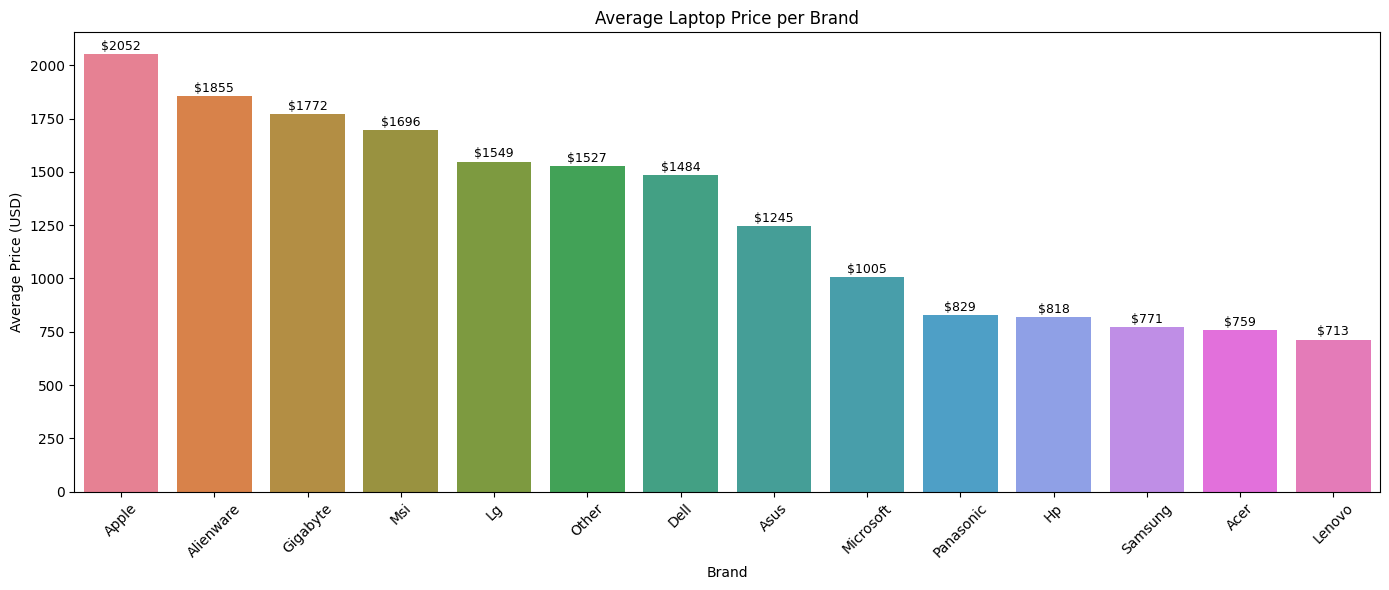

In [10]:
plt.figure(figsize=(14,6))

df['price_dollar'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
avg_price_per_brand = df.groupby('brand')['price_dollar'].mean().sort_values(ascending=False)

ax = sns.barplot(x=avg_price_per_brand.index, y=avg_price_per_brand.values, hue=avg_price_per_brand.index, legend=False)

# Add value labels on top
for i, val in enumerate(avg_price_per_brand.values):
    ax.text(i, val + 20, f'${val:.0f}', ha='center', fontsize=9)

plt.title("Average Laptop Price per Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Missing Values by brand

In [11]:
missing_price = df[df['price_dollar'].isna()]
print(missing_price['brand'].value_counts())

brand
Dell         2
Hp           2
Microsoft    1
Name: count, dtype: int64


**Note:** We will drop these null values

In [12]:
df = df[df['price_dollar'].notnull()]

## 3. `'model'`

--> **Null Values Check**

In [13]:
print("Total Null Values in 'model': ", df['model'].isna().sum())

Total Null Values in 'model':  1164


--> **Unique Values Check**

In [14]:
print(df['model'].unique())
print(f"\nTotal Unique Brands: {df['model'].nunique()}")

[nan 'Vector GP66 12UGS-267' 'MacBook Air' ... 'Ideapad 3 82H8'
 'Predator Helios 300' 'Inspiron 3510 Laptop']

Total Unique Brands: 1079


---
`Observation:`
- The total unique values is high, hence this column is not suitable for analysis and modelling
- we will keep this for use when displaying laptop details
- missing values are filled with  place holder --> 'Unkown Model' 

In [15]:
df['model'] = df['model'].fillna("Unknown Model")
print("Total Null Values in 'model': ", df['model'].isna().sum())

Total Null Values in 'model':  0


## 4. `'screen_size'`

--> **Null Values Check**

In [16]:
print("Total Null Values in 'screen_size': ", df['screen_size'].isna().sum())

Total Null Values in 'screen_size':  28


--> **Unique Values Check**

In [17]:
print(df['screen_size'].unique())
print(f"\nTotal Unique Screen Sizes: {df['screen_size'].nunique()}")

['14 Inches' '15.6 Inches' '15.66 Inches' '13.3 Inches' '15.3 Inches'
 '16 Inches' '17.3 Inches' '11.6 Inches' '15 Inches' '13.4 Inches'
 '18 Inches' '17 Inches' '16.2 Inches' '13.6 Inches' '14.4 Inches'
 '13 Inches' '14.5 Inches' '12.45 Inches' '12.2 Inches' '13.5 Inches'
 '13.1 Inches' '12 Inches' nan '10.5 Inches' '12.3 Inches' '10.1 Inches'
 '13.9 Inches' '14.1 Inches' '11 Inches' '15.4 Inches' '12.5 Inches'
 '16.1 Inches' '22 Inches' '12.4 Inches' '27 Inches' '10 Inches']

Total Unique Screen Sizes: 35


---
`Observation:`
- Containes 35 unique values
- 29 values were missing
- Values were in string format with the `" Inches"` suffix, not suitable for numerical modeling

`Approach:`
- Remove the `" Inches"` suffix and converted the values to float for numerical analysis
- Fill missing values using the **mode/median screen size** or we can group impute it if **brands average screen sizes** have some relation

### Distribution Of Screen Sizes

In [18]:
print(df['screen_size'].value_counts())
df['screen_size'] = df['screen_size'].str.replace(' Inches', '', regex=False).astype(float)

screen_size
15.6 Inches     1995
14 Inches       1112
16 Inches        362
15.66 Inches     196
13.3 Inches      193
17.3 Inches      150
17 Inches         89
11.6 Inches       84
13.4 Inches       43
18 Inches         41
13 Inches         36
15 Inches         24
13.5 Inches       11
12.5 Inches       10
14.1 Inches        9
10.1 Inches        7
12 Inches          7
13.1 Inches        6
16.1 Inches        5
16.2 Inches        4
13.6 Inches        4
14.5 Inches        4
12.3 Inches        3
15.4 Inches        3
13.9 Inches        3
11 Inches          2
12.45 Inches       2
12.2 Inches        1
14.4 Inches        1
15.3 Inches        1
10.5 Inches        1
22 Inches          1
12.4 Inches        1
27 Inches          1
10 Inches          1
Name: count, dtype: int64


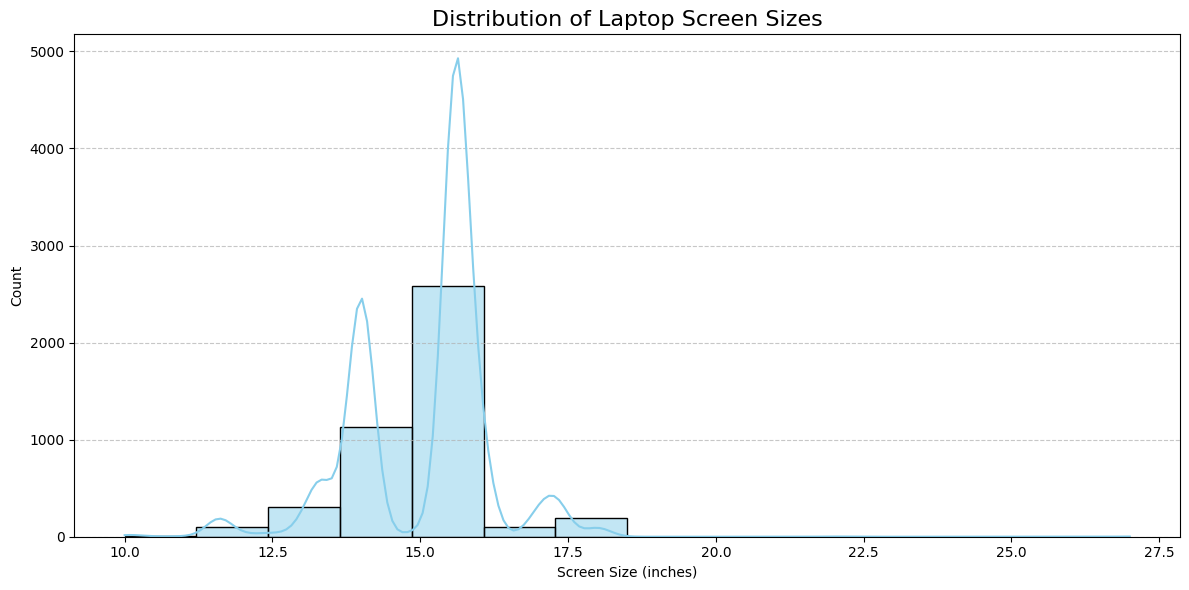

In [19]:
plt.figure(figsize=(12, 6))
n = len(df['screen_size'])
sns.histplot(df['screen_size'], bins=int(np.ceil(np.log2(n) + 1)), kde=True, color='skyblue')
plt.title("Distribution of Laptop Screen Sizes", fontsize=16)
plt.xlabel("Screen Size (inches)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Average Screen Size by brand

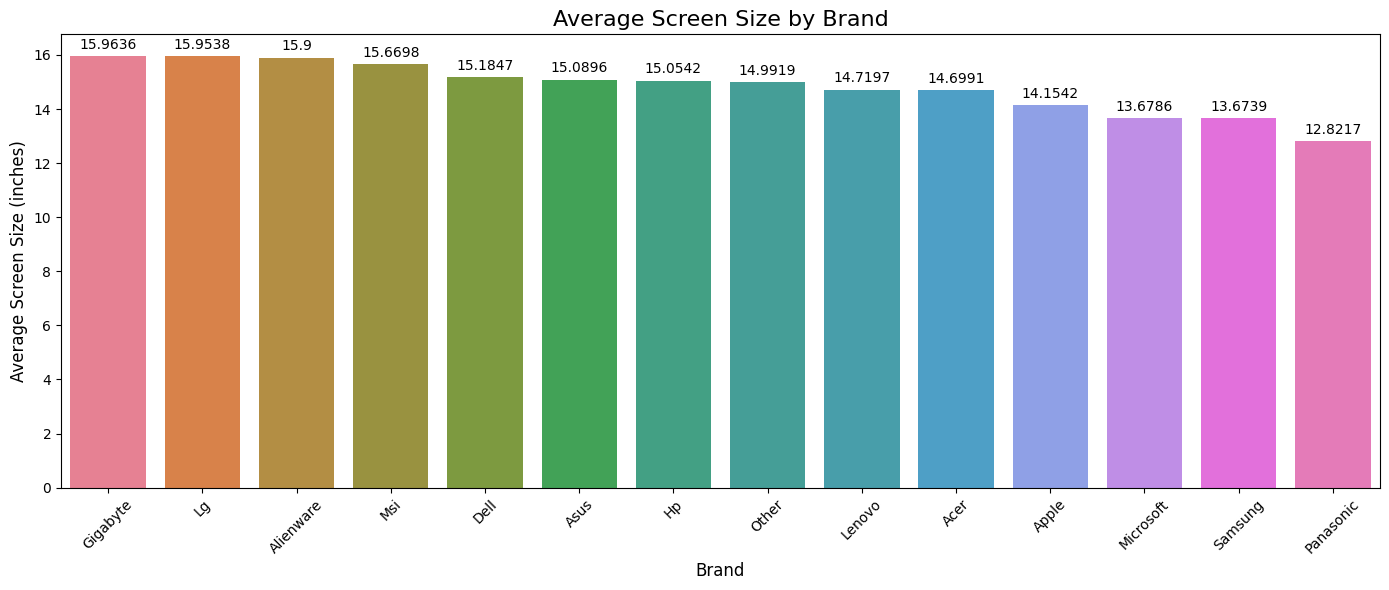

In [20]:
# Group by brand and calculate average screen size
brand_screen = df.groupby('brand')['screen_size'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
ax = sns.barplot(x=brand_screen.index, y=brand_screen.values, hue=brand_screen.index, legend=False)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

plt.title("Average Screen Size by Brand", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Average Screen Size (inches)", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Outlier Detection

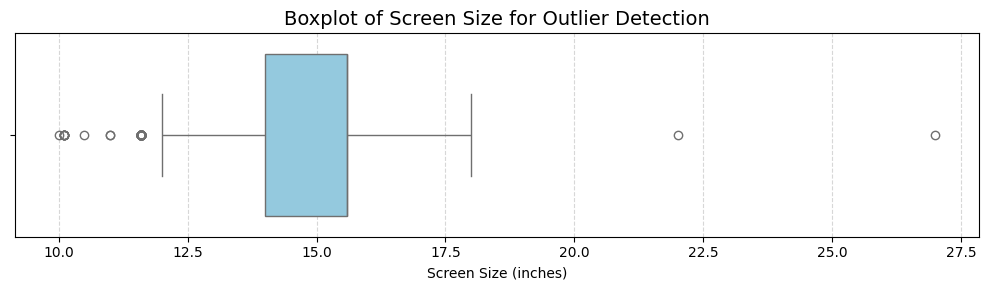

In [21]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['screen_size'], color='skyblue')
plt.title("Boxplot of Screen Size for Outlier Detection", fontsize=14)
plt.xlabel("Screen Size (inches)")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

`Action Taken:`
- Around `50%` of the screen sizes are `15.6 Inches`
- Outliers are present, also values are discrete so no mean imputation
- screen size by brand is also similar so no group/brand based imputation
- We will hence fill missing values with mode

In [22]:
df['screen_size'] = df['screen_size'].fillna(df['screen_size'].mode()[0])
print("Total Null Values in 'screen_size': ", df['screen_size'].isna().sum())

Total Null Values in 'screen_size':  0


## 5. `'Color'`

In [23]:
print("Total Null Values in 'color': ", df['color'].isna().sum())

Total Null Values in 'color':  578


In [24]:
print(df['color'].unique())
print(f"\nTotal Unique colors: {df['color'].nunique()}")

['Blue' 'Silver' 'Core Black' 'Midnight' 'Space Gray' 'Eclipse Gray'
 'Black' 'Grey' 'Gray' nan 'Graphite Black' 'Almond' 'Onyx Grey'
 'Mineral Silver' 'Arctic Grey' 'Star Black' 'Natural silver'
 'Touchscreen' 'Off Black' 'Acronym' 'Platinum' 'Mecha Gray'
 'Pale rose gold' 'Abyss Blue' 'Midnight Black' 'Rose Gold' 'Basalt Grey'
 'Graphite' 'Indie Black' 'Tech Black' 'Platinum Grey' 'Dale Gray'
 'Slate Gray' 'Quiet Blue' 'White' 'Shadow Grey' 'Chalkboard Gray'
 'Mercury' 'Green' 'Natural Silver' 'Dynamic White' 'Cosmo Gray'
 'Mineral Black' 'Ash Gray' 'Gold' 'Celestial Blue' 'Dark Grey'
 'Pebble Green' 'Fiesta Red' 'Neptune Blue' 'Gray, Platinum Silver' 'Sky'
 'Graphite Grey' 'Black with illuminated Razer Logo' 'Light Titan'
 'Lunar Light' 'Dark Side of the Moon' 'Mica Silver' 'Mercury Grey'
 'Horizon Blue' 'Platinum Gray' 'Modern Gray' 'Silver/Black'
 'Transparent Silver' 'Storm Grey' 'AI Blue' 'Ink Black' 'Ice Blue'
 'Mineral Gray' 'Pure Silver' 'RGB Backlit' 'Eclipse Grey' 'Classic 

`Observation:`
- Not interested in this information
- hence we can simply fill the missing with unknown

In [25]:
df['color'] = df['color'].fillna('Unknown')
print("Total Null Values in 'color': ", df['color'].isna().sum())

Total Null Values in 'color':  0


## 6. `'harddisk'`

In [26]:
print("Total Null Values in 'harddisk': ", df['harddisk'].isna().sum())

Total Null Values in 'harddisk':  575


In [27]:
print(df['harddisk'].unique())
print(f"\nTotal Unique harddisks: {df['harddisk'].nunique()}")

['1000 GB' nan '256 GB' '128 GB' '64 GB' '512 GB' '1 TB' '1152 GB' '64'
 '2 TB' '32 GB' '16 GB' '4 TB' '240 GB' '65 GB' '120 GB' '1024 GB'
 '300 GB' '320 GB' '2000 GB' '480 GB' '32 MB' '500 GB' '512' '128 MB'
 '250 GB' '160 GB' '64 MB' '8 GB' '8 TB' '4000 GB' '1256 GB' '1512 GB'
 '1.92 TB' '1.5 TB' '512 MB' '640 GB' '2048 GB' '256' '8000 GB' '6000 GB'
 '3 TB']

Total Unique harddisks: 41


---
`Observation:`
- We have a few inconsistencies here
- First being that there is no standadised unit, but a mix of MB, GB, and TB
- A few strange values also such as 65 GB, 1256 GB, 1512 GB most probably typos
- Some missing unit entries also such as 64, 256, 512
---

### Filter out the MB laptops and check their details

In [28]:
# Filter rows where harddisk column contains "MB"
mb_laptops = df[df['harddisk'].str.contains('MB', case=False, na=False)]
print((mb_laptops))

       brand             model  screen_size    color harddisk            cpu  \
748   Lenovo        Chromebook         14.0     Gray    32 MB            NaN   
923   Lenovo  Lenovo IdeaPad 1         14.0  Unknown   128 MB            NaN   
1256      Hp     HP Chromebook         14.0     Blue    64 MB  Celeron N4020   
2386  Lenovo    Lenovo Ideapad         15.6  Unknown   512 MB    AMD Ryzen 7   

       ram            OS     special_features    graphics  \
748   4 GB     Chrome OS     Backlit Keyboard  Integrated   
923   4 GB       Windows  Anti-glare,Hd Audio  Integrated   
1256  4 GB  Windows 10 S                  NaN  Integrated   
2386  8 GB    Windows 10           Anti-glare  Integrated   

        graphics_coprocessor cpu_speed  rating     price  price_dollar  
748            AMD Radeon R5       NaN     4.1  $289.00         289.00  
923   Intel UHD Graphics 605   1.1 GHz     4.3  $310.19         310.19  
1256  Intel UHD Graphics 600       NaN     4.3  $228.00         228.00  
2

- Only four laptops have harddisk in MB and looking into their other specs like ram and price these harddisk values don't see to be logically correct
- Hence we will make them into GB

### Filter out the no unit laptops and check their details

In [29]:
no_unit = df[
    df['harddisk'].notna() &                            # not null
    ~df['harddisk'].astype(str).str.upper().str.contains('GB|TB|MB')  # doesn't contain unit
]


print(no_unit[['brand', 'model', 'ram', 'cpu', 'harddisk', 'price']])

          brand                    model    ram            cpu harddisk  \
23           Hp  Chromebook 14a-na0226nr   4 GB        Celeron       64   
833   Panasonic      Panasonic Toughbook  16 GB  Intel Core i7      512   
3052  Panasonic                FZ-G1 MK5   8 GB        Core i5      256   

           price  
23      $249.00   
833   $1,773.99   
3052  $1,999.00   


- these also will be considered as in GB

### Standardising harddisk Unit

In [30]:
def convert_to_gb(value):
    if pd.isnull(value):
        return np.nan
    value = str(value).strip().upper()
    
    if 'TB' in value:
        return float(value.replace('TB', '').strip()) * 1024
    elif 'GB' in value:
        return float(value.replace('GB', '').strip())
    elif 'MB' in value:
        return float(value.replace('MB', '').strip())
    elif value.isnumeric():  
        return float(value)
    else:
        return np.nan

# New Standardaised Column
df['harddisk_gb'] = df['harddisk'].apply(convert_to_gb)

### Fixing Strange Values

---
--> harddisk_gb column contains several strange or outlier values that likely stem from:
- Typos or incorrect entries (e.g., 1256, 1152, 1966.08, 1512)
- Non-standard or rare capacities that may not represent actual products (e.g., 65, 300, 1536, 3072)
- Tiny capacities like 8GB or 16GB which aren't realistic for modern laptop hard disks.

In [31]:
valid_capacities = [32, 64, 128, 240, 256, 320, 500, 512, 1000, 1024, 2000, 2048, 4000, 4096, 8000]

def correct_harddisk(val):
    if pd.isnull(val):
        return np.nan
    # If it's already valid, return as is
    if val in valid_capacities:
        return val
    # Otherwise, snap to closest valid value
    return min(valid_capacities, key=lambda x: abs(x - val))

# Apply correction
df['harddisk_gb'] = df['harddisk_gb'].apply(correct_harddisk)

### Missing Values by brand

In [32]:
missing_hd = df[df['harddisk_gb'].isna()]

print("Missing Values by brand: ")
print(missing_hd['brand'].value_counts())

print("\n\nTotal Laptops by brand")
print(df['brand'].value_counts())

Missing Values by brand: 
brand
Msi          406
Dell          45
Lenovo        43
Hp            40
Acer          12
Asus           9
Other          7
Samsung        5
Microsoft      3
Apple          2
Lg             2
Alienware      1
Name: count, dtype: int64


Total Laptops by brand
brand
Dell         1731
Lenovo        955
Hp            808
Msi           473
Asus          163
Acer          119
Lg             39
Other          39
Apple          29
Samsung        23
Panasonic      23
Microsoft      14
Alienware      14
Gigabyte       11
Name: count, dtype: int64


`Observation:`
- the main problem lies in for msi as it is a good chunk of our data and has around 80% missing values

### Mode Harddisk by brand

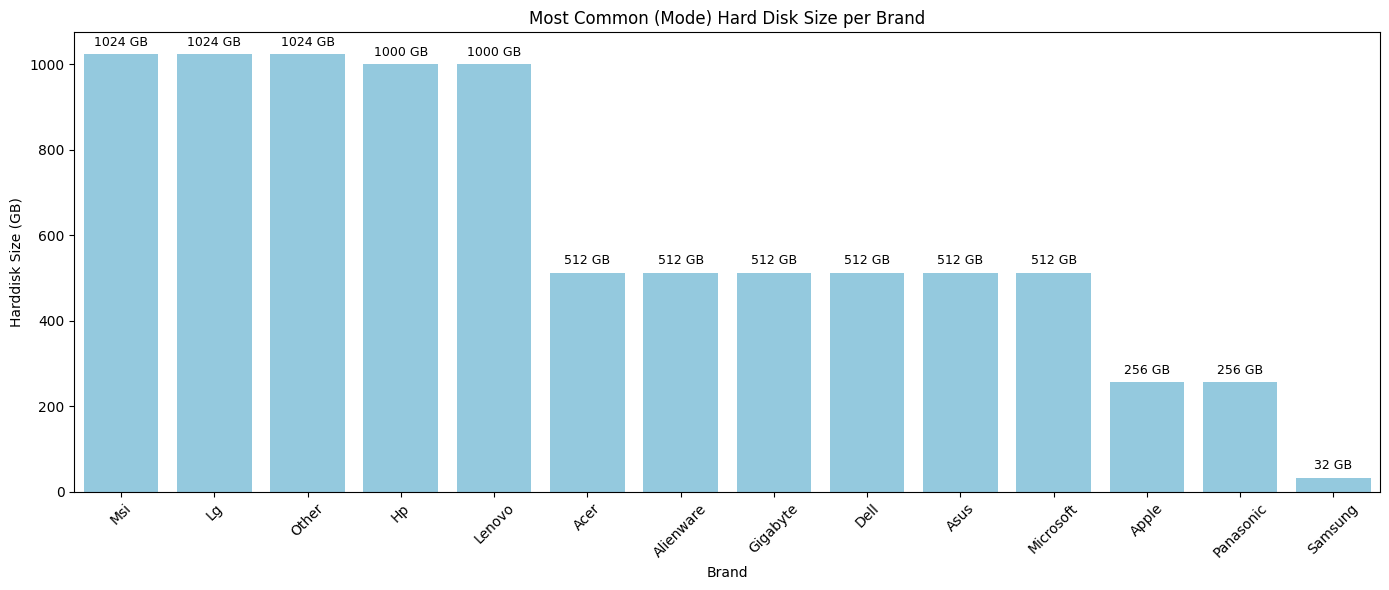

In [33]:
# Group by brand and get mode
mode_hd_per_brand = df[~df['harddisk_gb'].isna()].groupby('brand')['harddisk_gb'] \
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan) \
    .sort_values(ascending=False)


plt.figure(figsize=(14,6))
ax = sns.barplot(x=mode_hd_per_brand.index, y=mode_hd_per_brand.values, color='skyblue')
for i, val in enumerate(mode_hd_per_brand.values):
    ax.text(i, val + 20, f'{val:.0f} GB', ha='center', fontsize=9)

plt.title("Most Common (Mode) Hard Disk Size per Brand")
plt.xlabel("Brand")
plt.ylabel("Harddisk Size (GB)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Msi harddisk sizes and counts

In [34]:
df[df['brand'] == 'Msi']['harddisk_gb'].value_counts()

harddisk_gb
1024.0    34
512.0     19
2048.0     9
32.0       2
256.0      1
4096.0     1
128.0      1
Name: count, dtype: int64

### Global Laptop harddisk sizes and average prices

In [35]:
# Group by harddisk size
result = df.groupby('harddisk_gb').agg(
    count=('harddisk_gb', 'count'),
    avg_price=('price_dollar', 'mean')
).sort_values(by='count', ascending=False)

print(result)

             count    avg_price
harddisk_gb                    
1000.0        1334   984.227721
512.0          749  1402.931001
1024.0         496  1264.160060
256.0          476   991.089412
64.0           197   354.192030
2000.0         167  1884.362934
2048.0         125  1867.810160
128.0          119   578.766891
32.0            59   569.049322
4000.0          48  2274.390625
500.0           36   447.137222
4096.0          29  2561.958276
8000.0          20  2698.853000
320.0            9   172.081111
240.0            2   435.000000


`Action Taken:`
- Majority Msi laptops have harddisk of 1024 GB
- Avergae price for a laptop having 1024 GB is 1264 USD
- The Avergae Msi laptop price is 1696 USD
- Therefore, missing harddisk_gb values for MSI laptops were imputed using 1024 GB, maintaining consistency with both brand-level patterns and global pricing trends.

### Brand Wise Mode Imputation

In [36]:
# Create a flag column to track imputation
df['harddisk_imputed'] = False

brands_with_missing = df[df['harddisk_gb'].isna()]['brand'].dropna().unique()

# Impute missing values with brand-wise mode
for brand in brands_with_missing:
    # Get mode value for that brand
    mode_val = df[(df['brand'] == brand) & (~df['harddisk_gb'].isna())]['harddisk_gb'].mode()
    
    # If mode exists, impute only missing values and flag them
    if not mode_val.empty:
        mask_missing = (df['brand'] == brand) & (df['harddisk_gb'].isna())
        df.loc[mask_missing, 'harddisk_gb'] = mode_val.iloc[0]
        df.loc[mask_missing, 'harddisk_imputed'] = True


print("Total values imputed:", df['harddisk_imputed'].sum())
print("\nSample of imputed rows:")
print(df[df['harddisk_imputed']].head())

Total values imputed: 575

Sample of imputed rows:
   brand                   model  screen_size         color harddisk  \
2    Msi   Vector GP66 12UGS-267        15.66    Core Black      NaN   
26  Asus           ROG Strix G16        16.00  Eclipse Gray      NaN   
27   Msi  Stealth GS66 12UGS-025        15.60    Core Black      NaN   
31   Msi   Vector GP66 12UGS-267        15.66    Core Black      NaN   
55   Msi  Stealth GS66 12UGS-025        15.60    Core Black      NaN   

              cpu    ram               OS special_features   graphics  \
2   Intel Core i9  32 GB  Windows 11 Home              NaN  Dedicated   
26        Core i9  32 GB   Windows 11 Pro              NaN  Dedicated   
27  Intel Core i9  32 GB  Windows 11 Home              NaN  Dedicated   
31  Intel Core i9  32 GB  Windows 11 Home              NaN  Dedicated   
55  Intel Core i9  32 GB  Windows 11 Home              NaN  Dedicated   

       graphics_coprocessor cpu_speed  rating       price  price_dollar  \
2 

## `'cpu'`

--> **Null Values Check**

In [37]:
print("Total Null Values in 'cpu': ", df['cpu'].isna().sum())

Total Null Values in 'cpu':  100


--> **Unique Values Check**

In [38]:
print(df['cpu'].unique())
print(f"\nTotal Unique cpu's: {df['cpu'].nunique()}")

['Intel Core i7' 'Intel Core i5' 'Intel Core i9' 'Unknown' 'Ryzen 3'
 'Celeron N4020' 'Core i7' 'Core I3 1115G4' 'Core i5' 'Ryzen 3 3250U'
 'Pentium' 'Pentium N5000' 'AMD Ryzen 7' 'Intel Core i3' 'Core i3'
 'Ryzen 5' 'Celeron' 'Core i3 Family' 'Core i9' 'Celeron N'
 'Celeron P4500' 'AMD Ryzen 5 5500U' 'Core i3-1115G4E' 'MediaTek MT8183'
 'Ryzen 7' 'Ryzen 9' 'Core i7-8650U' 'Intel Core i7-1355U' 'ARM 7100'
 'Apple M1' 'Celeron N4000' 'Core i7-13700K' nan 'MediaTek_MT8127'
 'Core i5 Family' 'Core i5 6200U' 'Celeron N3450' 'Ryzen 3 3350U'
 'Ryzen 9 7900X' 'Core i3-1005G1' 'Core i7 Family' 'AMD A Series' 'Others'
 'Celeron N3350' 'Snapdragon' 'Intel Core i5-1135G7' 'Core i5-10210U'
 '8032' 'AMD Ryzen 3 2300X' 'Ryzen 5 5500U' 'Intel Core i7 12800H'
 'Cortex' 'Core i5-1130G7' 'Ryzen 7 5800H' 'Athlon' 'Pentium Other'
 'Intel Core i7-1165G7' 'Core i5 5300U' 'Core i5 7200U'
 '1.2GHz Cortex A8 Processor' 'Core i5 4310M' 'Ryzen 3 3200U'
 'Apple M2 Max' 'Ryzen 5 3500U' 'MediaTek Helio P60T' 'Core 

`Obseravtion:`

- The cpu column contains 141 unique values, many of which are inconsistent, unstructured, or verbose.
- Entries represent a mix of:
1. CPU brands (e.g., Intel, AMD, Apple)
2. CPU families and series (e.g., Core i5, Ryzen 7)
3. CPU generations and models (e.g., i5-1135G7, Ryzen 5 5500U)
4. Clock speeds, architecture types (e.g., "1.2GHz Cortex A13 Processor")
5. There are typos, casing issues, duplicates, and non-standard labels like 'Unknown', 'Others', '68000', '8032'
- 100 missing values were found.
- Many CPUs occur only once or twice, making them unsuitable for analysis.

`Action Taken:`
- We created a new column: 'cpu_family', by mapping each raw CPU value to 24 well-defined categories based on general performance tiers (e.g., Core i9, Ryzen 7, Apple M1, Celeron, etc.).
- Lowercased and string-matched the CPU names using keyword-based logic.
- Rare, unclear values were grouped under 'Others' or 'Unknown'.
- This categorization prepares the column for future modeling and performance weight assignments.

In [39]:
# Fill nulls with 'Unknown' to avoid type issues
df['cpu'] = df['cpu'].fillna('Unknown')

def extract_cpu_family(cpu):
    cpu = str(cpu).strip().lower()

    if cpu in ['', 'unknown', 'others', 'nan']:
        return 'Unknown'

    elif 'core i9' in cpu:
        return 'Core i9'
    elif 'ryzen 9' in cpu:
        return 'Ryzen 9'
    elif 'core i7' in cpu:
        return 'Core i7'
    elif 'ryzen 7' in cpu:
        return 'Ryzen 7'
    elif 'core i5' in cpu:
        return 'Core i5'
    elif 'ryzen 5' in cpu:
        return 'Ryzen 5'
    elif 'core i3' in cpu:
        return 'Core i3'
    elif 'ryzen 3' in cpu:
        return 'Ryzen 3'
    elif 'apple m2' in cpu:
        return 'Apple M2'
    elif 'apple m1' in cpu:
        return 'Apple M1'
    elif 'xeon' in cpu:
        return 'Xeon'
    elif 'core m' in cpu or 'core-m' in cpu:
        return 'Core M'
    elif 'pentium' in cpu:
        return 'Pentium'
    elif 'celeron' in cpu:
        return 'Celeron'
    elif 'atom' in cpu:
        return 'Atom'
    elif 'amd a' in cpu or 'a-series' in cpu or 'a10' in cpu or 'a4' in cpu:
        return 'AMD A Series'
    elif 'athlon' in cpu:
        return 'Athlon'
    elif 'mediatek' in cpu:
        return 'MediaTek'
    elif 'snapdragon' in cpu:
        return 'Snapdragon'
    elif 'arm' in cpu or 'cortex' in cpu:
        return 'ARM'
    elif 'core 2 duo' in cpu:
        return 'Core 2 Duo'
    elif 'r series' in cpu:
        return 'R Series'
    else:
        return 'Unknown'


df['cpu_family'] = df['cpu'].apply(extract_cpu_family)

# Groupby count an avg price analysis
result = df.groupby('cpu_family').agg(
    count=('cpu_family', 'count'),
    avg_price=('price_dollar', 'mean')
).sort_values(by='avg_price', ascending=False)

print(result)

              count    avg_price
cpu_family                      
Apple M2          3  4004.310000
Xeon              3  3778.363333
Ryzen 9          12  2311.409167
Core i9         569  2076.945132
Apple M1          7  1601.375714
Core i7        1438  1475.579680
Ryzen 7         117  1417.119829
Unknown         156  1155.545256
Core i5        1284   932.854759
R Series         15   894.438667
Ryzen 5          40   800.910000
Core M            6   742.223333
ARM               9   741.237778
Snapdragon        3   739.816667
Core i3          90   512.429222
AMD A Series     19   461.376316
Pentium         367   422.918719
Ryzen 3          12   398.585000
Celeron         264   349.421364
Athlon            7   271.567143
Atom              4   257.497500
MediaTek         13   221.730000
Core 2 Duo        3    88.173333


## `'ram'`

--> **Null Values Check**

In [40]:
print("Total Null Values in 'ram': ", df['ram'].isna().sum())

Total Null Values in 'ram':  61


--> **Unique Values Check**

In [41]:
print(df['ram'].unique())
print(f"\nTotal Unique ram's: {df['ram'].nunique()}")

['8 GB' '64 GB' '32 GB' '4 GB' '16 GB' '20 GB' nan '12 GB' '40 GB' '96 GB'
 '6 GB' '1 GB' '2 GB' '48 GB' '24 GB' '64 MB' '5 GB' '128 GB' '31.99 GB']

Total Unique ram's: 18


`Observation:`
- The RAM values are stored as strings with units (e.g: '8 GB', '64 GB').
- There are null values (61 rows).
- A few suspicious or non-standard values exist:
1. 64 MB → much smaller than others (likely outdated device/ typo)
2. 31.99 GB → likely a float from poor parsing, should be treated as '32 GB'

`Approach:`
  1. Calculated the average price of all rows with null ram.
  2. Computed average prices for each valid RAM category.
  3. Found the RAM size whose average price was closest to the null rows' average price.
  4. Imputed all null values in ram with this closest-matching RAM value.

In [42]:
# mapping for the corrections
ram_corrections = {
    '64 MB': '64 GB', #'64 GB' (likely a typo)
    '31.99 GB': '32 GB',
    '5 GB': '16 GB', #only one entry, avg price much higher than usual for 5 GB, aligns closely with 16GB pricing
    '1 GB' : '12 GB' #same scenario here as 5 GB
}


df['ram'] = df['ram'].replace(ram_corrections)


print("Unique RAM values after corrections:")
print(sorted(df['ram'].dropna().unique()))

Unique RAM values after corrections:
['12 GB', '128 GB', '16 GB', '2 GB', '20 GB', '24 GB', '32 GB', '4 GB', '40 GB', '48 GB', '6 GB', '64 GB', '8 GB', '96 GB']


In [43]:
# Groupby count an avg price analysis
result = df.groupby('ram').agg(
    count=('ram', 'count'),
    avg_price=('price_dollar', 'mean')
).sort_values(by='avg_price', ascending=False)

print(result)

        count    avg_price
ram                       
96 GB       1  5299.000000
128 GB      3  4657.860000
64 GB     503  1717.157435
48 GB      12  1713.331667
32 GB    1093  1666.447484
40 GB      13  1519.224615
24 GB      21  1279.103333
16 GB    1344  1184.581860
12 GB      44   844.086818
8 GB      788   707.822678
20 GB     331   503.070785
6 GB        3   411.866667
4 GB      215   385.972093
2 GB        9   163.814444


In [44]:
avg_price_null_ram = df[df['ram'].isnull()]['price_dollar'].mean()
print("Average price of rows where RAM is null:", avg_price_null_ram)

Average price of rows where RAM is null: 1164.2818032786888


- The average price of these rows was approximately 1164.28 USD
- Based on RAM price distribution, 16 GB (avg price ≈ 1184.58 USD) was the closest match
- Imputed all null RAM values with 16 GB

In [45]:
df['ram'] = df['ram'].fillna('16 GB')
print(f"Remaining Nulls in RAM: {df['ram'].isnull().sum()}")

Remaining Nulls in RAM: 0


In [46]:
# Strip 'GB' or other non-digit characters and convert to float
df['ram_gb'] = df['ram'].str.extract(r'(\d+\.?\d*)').astype(float)

## `'OS'`

--> **Null Values Check**

In [47]:
print("Total Null Values in 'OS': ", df['OS'].isna().sum())

Total Null Values in 'OS':  26


--> **Unique Values Check**

In [48]:
print(df['OS'].unique())
print(f"\nTotal Unique OS's: {df['OS'].nunique()}")

['Windows 11' 'Windows 11 Pro' 'Windows 11 Home' 'Mac OS' 'Windows 11 S'
 'Chrome OS' 'Windows 10 S' 'Windows 10 Pro' 'macOS 12 Monterey' nan
 'Windows 10 Home' 'Windows 10' 'Windows 11 Home S' 'Windows'
 'macOS 10.14 Mojave' 'macOS 10.12 Sierra' 'Windows 7 Professional'
 'Windows 7 Pro + 10 Pro' 'PC' 'Mac OS X 10.0 Cheetah' 'Windows 7'
 'Windows 10 Pro 64 Bit-Multi-Language Supports English/Spanish/French'
 'Windows 10 S, Windows 10' 'Windows 11 Pro, Windows'
 'Windows 10 Professional 64-bit'
 'Windows 10 Pro 64 Bit-Multi-Language Support English/French/Spanish.'
 'Windows 7 Home Premium'
 'Windows 10 Pro 64 Bit Multi-Language Support English/French/Spanish'
 'Windows 11 Home in S Mode' 'Windows 8' 'No'
 'Win 10 Multi-language /Free upgrade to Win 11'
 'Windows 10 64 Bit-Multi-Language Supports English/Spanish/French'
 'Windows 10 Pro (English/French/Spanish)'
 'Win 10 Pro 64 Bit Multi-Language Support English/French/Spanish(Renewed)'
 'Windows Pro' 'Windows 10 Pro (64-Bit)' 'HP ThinP

---
`'Observation:'`
- Found 26 null values in the `OS` column.
- Replaced nulls with `'No OS'`.
- Mapped 49 unique messy/marketing-heavy OS strings into 10 standard categories:
  - Windows 11, Windows 10, Windows 8, Windows 7
  - macOS, Chrome OS, Linux
  - HP ThinPro
  - No OS (for missing/unknown/invalid values)
  - Other 

In [49]:
df['OS'] = df['OS'].fillna('No OS')


def clean_os(os):
    os = str(os).lower()

    if 'windows 11' in os:
        return 'Windows 11'
    elif 'windows 10' in os:
        return 'Windows 10'
    elif 'windows 8' in os:
        return 'Windows 8'
    elif 'windows 7' in os:
        return 'Windows 7'
    elif 'mac os' in os or 'macos' in os or 'os x' in os:
        return 'macOS'
    elif 'chrome' in os:
        return 'Chrome OS'
    elif 'linux' in os:
        return 'Linux'
    elif 'thinpro' in os:
        return 'HP ThinPro'
    elif os in ['no', 'pc', 'unknown', 'no os']:
        return 'No OS'
    else:
        return 'Other'

df['OS'] = df['OS'].apply(clean_os)


print("OS Category Distribution:\n")
print(df['OS'].value_counts())

OS Category Distribution:

OS
Windows 11    3112
Windows 10    1086
Chrome OS      125
macOS           30
Windows 7       30
No OS           29
Other           16
Windows 8       11
HP ThinPro       1
Linux            1
Name: count, dtype: int64


## `'graphics'`

--> **Null Values Check**

In [50]:
print("Total Null Values in 'graphics': ", df['graphics'].isna().sum())

Total Null Values in 'graphics':  64


--> **Unique Values Check**

In [51]:
print(df['graphics'].unique())
print(f"\nTotal Unique graphics: {df['graphics'].nunique()}")

['Integrated' 'Dedicated' 'RTX 4050' 'RTX 4070' 'Intel XE' 'RTX 3060'
 'RTX 3050' 'UHD Graphics' 'NVIDIA® GeForce RTX™ 4060' nan 'RTX 4080'
 'Intel UHD Graphics' 'Integrated, Dedicated' 'Iris Xe Graphics'
 'AMD Radeon Graphics' 'RTX 3070Ti' 'RTX 3070 Ti' 'RTX2050'
 'Nvidia GeForce RTX 3060' 'GeForce RTX 2050' 'Radeon Graphics'
 'RTX A1000' 'shared' 'RTX 3050 Ti' 'RTX A2000' 'Intel Iris Xᵉ'
 'QN20-M1-R' 'RTX 4060' 'GeForce RTX 4050'
 'Integrated AMD Radeon™ Graphics' 'Intel Iris, Integrated' 'Iris Xe'
 'Radeon 680M Graphics' 'Nvidia GeForce RTX 4060' 'RTX 3080 Ti'
 'RTX A2000,UHD Graphics' 'Nvidia Quadro T2000' 'Iris X Graphics'
 'GeForce RTX 3080' 'Nvidia GeForce RTX 3050 Ti' 'Radeon 680M' 'RTX A3000'
 'Intel HD Graphics 5000, Integrated' 'AMD Radeon' 'RTX 3500 Ada'
 'Nvidia GeForce RTX 3070' 'RTX A500' 'GeForce RTX 3070' 'NVIDIA RTX 2060'
 'UHD Graphics 600' 'Quadro T500' 'NVIDIA GeForce GTX 1650 4GB' 'T550'
 'T500,Iris Xe Graphics' 'NVIDIA GeForce RTX2060' 'GT2 Graphics'
 'GeForce RT

In [52]:
df['graphics'].value_counts().to_dict()

{'Integrated': 3017,
 'Dedicated': 850,
 'Iris Xe Graphics': 89,
 'Nvidia GeForce RTX 4070': 30,
 'UHD Graphics': 29,
 'Nvidia GeForce RTX 3050 Ti': 24,
 'Integrated, Dedicated': 22,
 'Nvidia RTX A3000': 20,
 'Radeon Graphics': 20,
 'Nvidia GeForce RTX 4090': 17,
 'Nvidia GeForce RTX 4060': 13,
 'Nvidia GeForce RTX 3050': 11,
 'Nvidia GeForce RTX 4050': 10,
 'Nvidia T1200': 9,
 'Nvidia GeForce RTX A500': 8,
 'T550': 8,
 'Nvidia RTX A2000': 7,
 'Nvidia RTX A1000': 7,
 'Nvidia Quadro RTX 3000': 6,
 'RTX A2000': 6,
 'Nvidia GeForce RTX 3060': 6,
 'RTX A1000': 6,
 'Nvidia RTX 2000 Ada': 5,
 'RTX 3060': 5,
 'RTX A500': 5,
 'Radeon 680M Graphics': 5,
 'Intel UHD Graphics': 4,
 'Nvidia GeForce RTX 3070': 4,
 'Intel XE': 4,
 'Nvidia RTX A4500': 4,
 'Nvidia GeForce MX250': 4,
 'AMD RADEON RX 540': 4,
 'AMD Integrated Graphics': 4,
 'Nvidia GeForce RTX 4080': 4,
 'Iris X Graphics': 3,
 'RTX A3000': 3,
 'RTX 3080 Ti': 3,
 'Nvidia Quadro T550': 3,
 'UHD Graphics 610': 3,
 'T500,Iris Xe Graphics': 

---
`Observation:`
- The graphics column contains 109 unique values with 65 nulls.
- Many entries are detailed GPU models like "Nvidia GeForce RTX 4060" or "AMD Radeon Graphics".
- A large portion of values are general terms like "Integrated" or "Dedicated".
- Some entries combine types, e.g., "Integrated, Dedicated", or are ambiguous like "Shared, Integrated" or "Unknown".
- More than half of the values fall under the Integrated category.
- The presence of highly granular GPU names makes this column too sparse to be useful in its raw form.

`Action Taken:`
- Null values in the graphics column were replaced with "Unknown".
- A new column graphics_type was created to simplify the graphics column into 3 meaningful categories:
- 'Integrated': Includes terms like "integrated", "iris", "uhd", "shared", "intel HD", etc.
- 'Dedicated': Includes "nvidia", "rtx", "gtx", "quadro", "radeon", and other known dedicated GPUs.
- 'Both': For values containing both "integrated" and "dedicated".
- 'Unknown': For unclear or null entries.
- This transformation reduces noise and prepares the column for future use in feature engineering or modeling.

In [53]:
df['graphics'] = df['graphics'].fillna('Unknown')


def classify_graphics(gpu):
    gpu = str(gpu).lower()

    if 'integrated' in gpu and 'dedicated' in gpu:
        return 'Both'
    elif 'integrated' in gpu or 'iris' in gpu or 'uhd' in gpu or 'shared' in gpu or 'intel hd' in gpu:
        return 'Integrated'
    elif any(keyword in gpu for keyword in ['nvidia', 'radeon', 'rtx', 'gtx', 'quadro', 't500', 't550', 'a1000', 'a2000', 'a3000', 'a4000', 'a4500', 'a5000']):
        return 'Dedicated'
    elif gpu in ['unknown', 'nan', 'none', '']:
        return 'Unknown'
    else:
        return 'Unknown'


df['graphics_type'] = df['graphics'].apply(classify_graphics)


print("Graphics Type Value Counts:")
print(df['graphics_type'].value_counts())

Graphics Type Value Counts:
graphics_type
Integrated    3167
Unknown        926
Dedicated      326
Both            22
Name: count, dtype: int64


## `graphics_coprocessor`, `cpu_speed`, and `rating`

`Observation  Action Taken:`
Columns like `graphics_coprocessor`, `cpu_speed`, and `rating` have significant missing values and limited analytical usefulness. However, instead of dropping them, we are retaining them as supplementary fields to enhance laptop detail display for users.

# `(iv): Exploratory Data Analysis (EDA) `

## `Univariate Analyis`

### `Price Distribution`

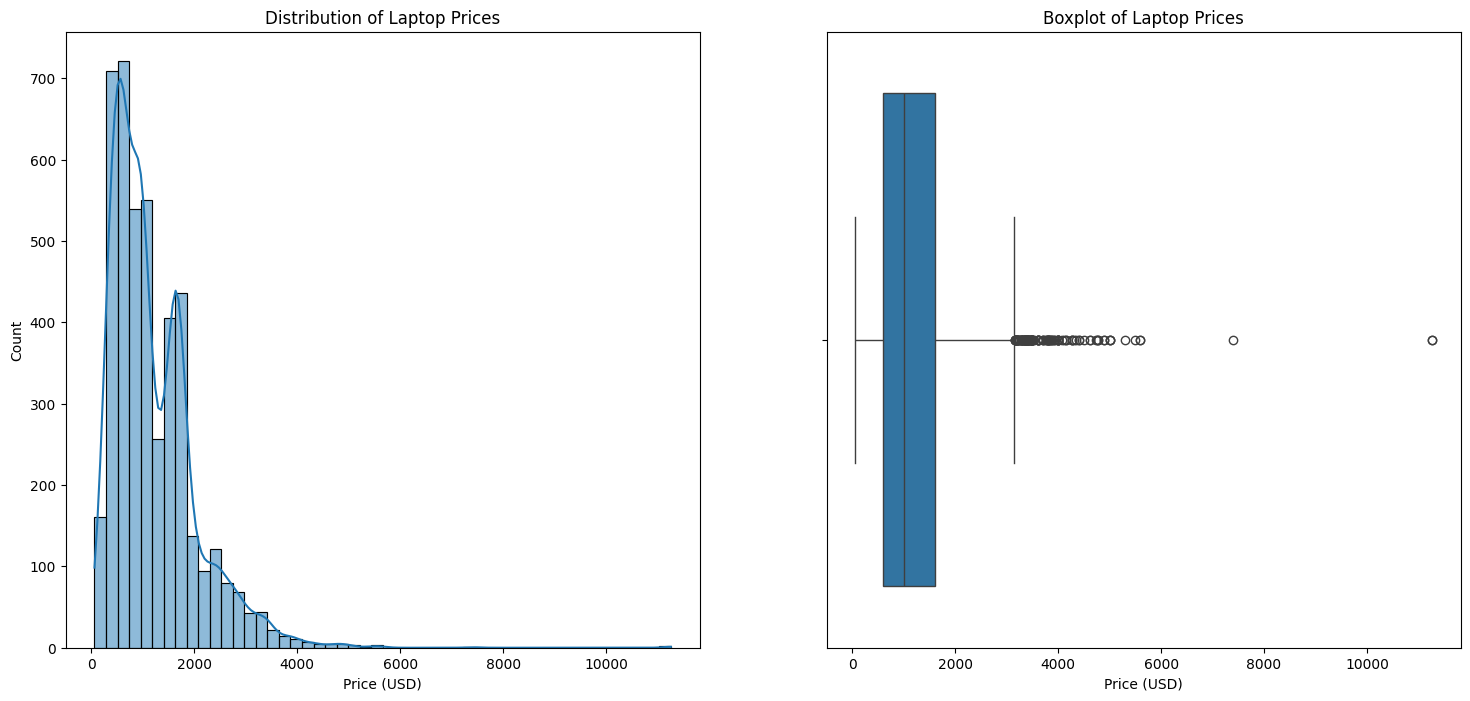

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))

#histogram
sns.histplot(df['price_dollar'], kde=True, bins=50, ax=axes[0])
axes[0].set_title('Distribution of Laptop Prices')
axes[0].set_xlabel('Price (USD)')
axes[0].set_ylabel('Count')


#boxplot
sns.boxplot(x=df['price_dollar'], ax=axes[1])
axes[1].set_title('Boxplot of Laptop Prices')
axes[1].set_xlabel('Price (USD)')

#plt.tight_layout()
plt.show()

### `Brands Distribution`

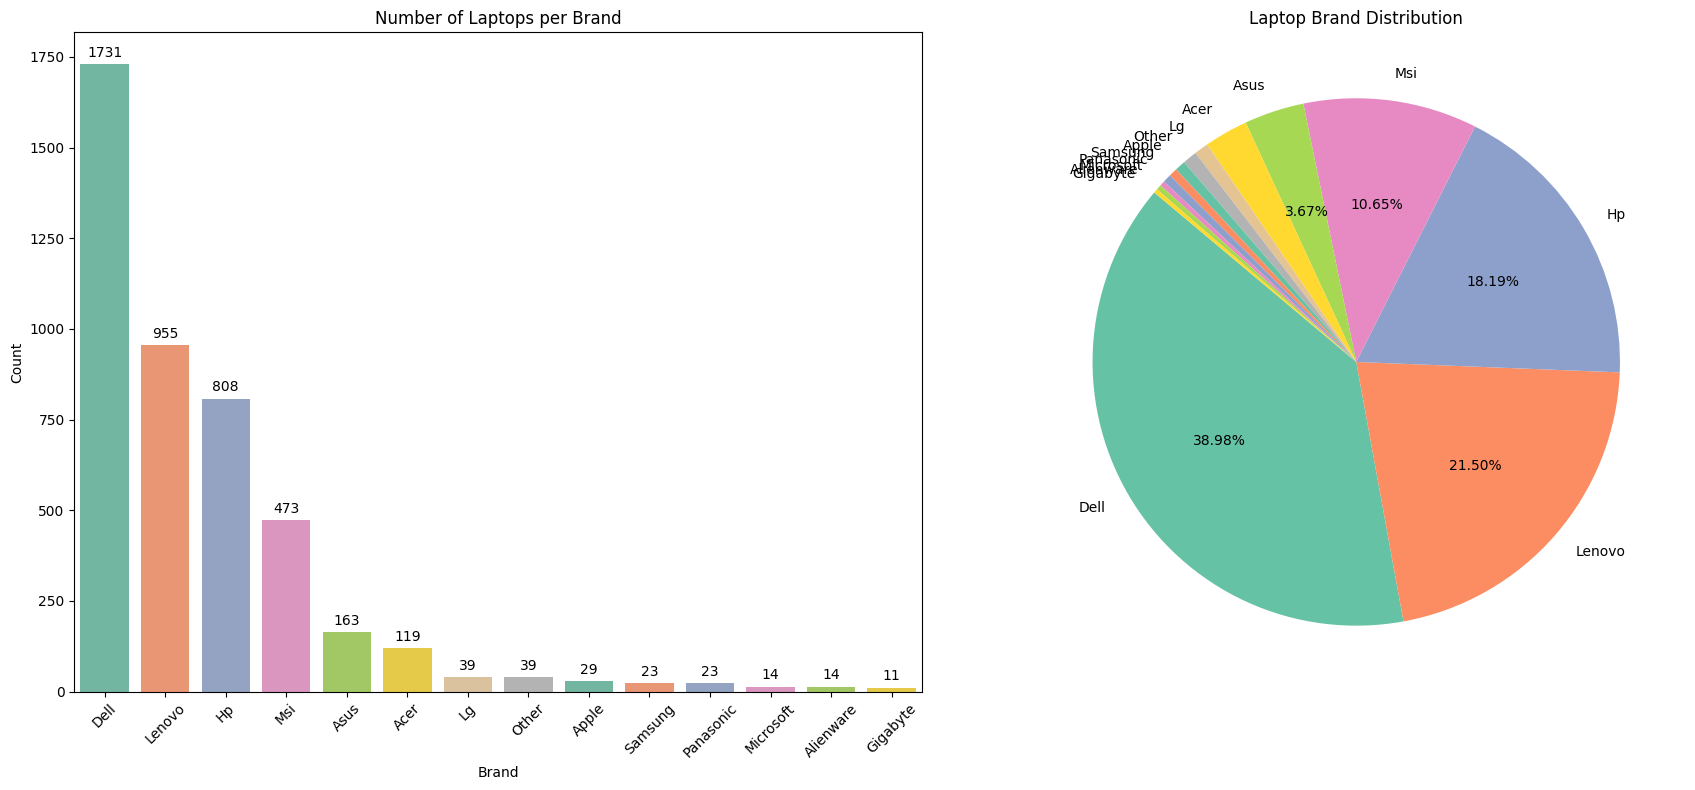

In [55]:
brands = df['brand'].value_counts().index.tolist()
colors = sns.color_palette('Set2', n_colors=len(brands))
brand_color_dict = dict(zip(brands, colors))

fig, axes = plt.subplots(1, 2, figsize=(18,8))


bar_ax = sns.countplot(data=df, x='brand', order=brands, hue='brand', ax=axes[0], palette=brand_color_dict ,legend=False)
bar_ax.set_title("Number of Laptops per Brand")
bar_ax.set_xlabel("Brand")
bar_ax.set_ylabel("Count")
bar_ax.tick_params(axis='x', rotation=45)

# Add count labels on top of each bar
for container in bar_ax.containers:
    bar_ax.bar_label(container, label_type='edge', padding=3, fontsize=10)


brand_counts = df['brand'].value_counts()
axes[1].pie(brand_counts, labels=brand_counts.index, autopct=lambda pct: f'{pct:.2f}%' if pct > 3 else '', startangle=140, colors=colors)
axes[1].set_title("Laptop Brand Distribution")

plt.tight_layout()
plt.show()

### `Ram Distribution`

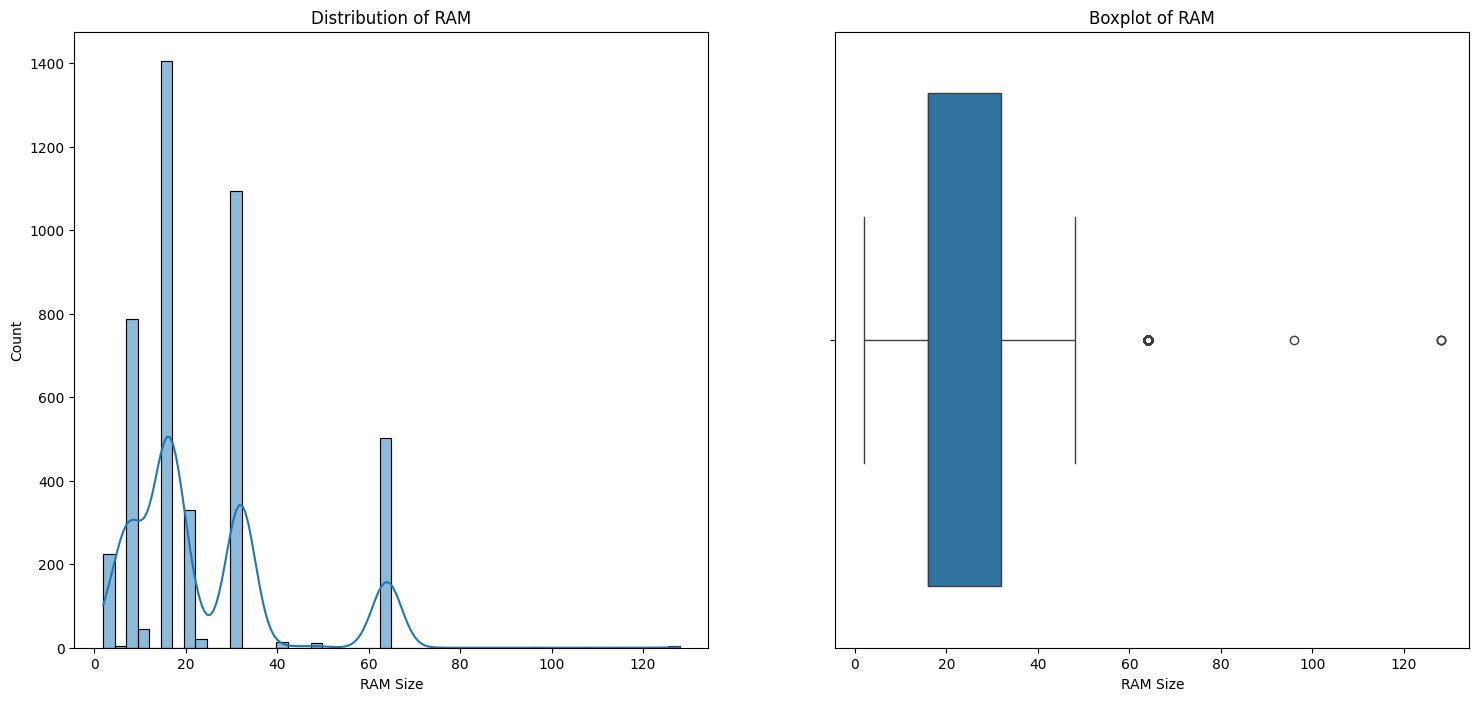

In [56]:
ig, axes = plt.subplots(1, 2, figsize=(18,8))

#histogram
sns.histplot(df['ram_gb'], kde=True, bins=50, ax=axes[0])
axes[0].set_title('Distribution of RAM')
axes[0].set_xlabel('RAM Size')
axes[0].set_ylabel('Count')


#boxplot
sns.boxplot(x=df['ram_gb'], ax=axes[1])
axes[1].set_title('Boxplot of RAM')
axes[1].set_xlabel('RAM Size')

#plt.tight_layout()
plt.show()

### `Harddisk Distribution`

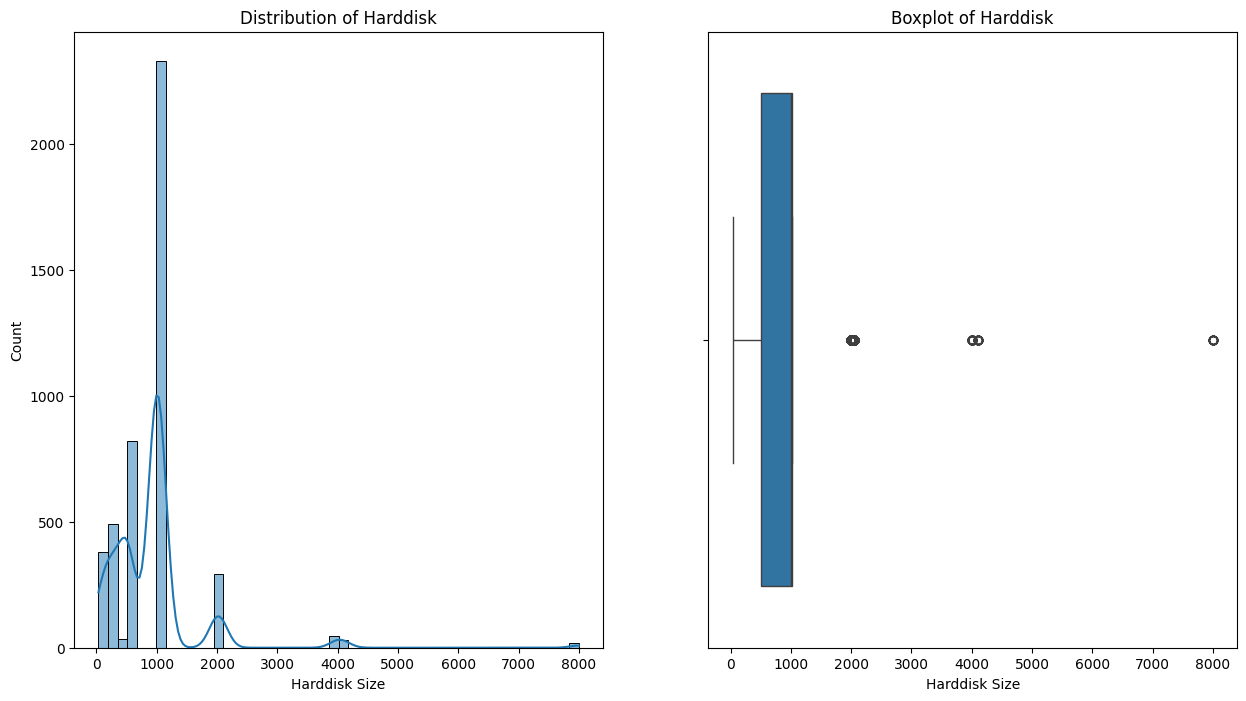

In [57]:
ig, axes = plt.subplots(1, 2, figsize=(15,8))

#histogram
sns.histplot(df['harddisk_gb'], kde=True, bins=50, ax=axes[0])
axes[0].set_title('Distribution of Harddisk')
axes[0].set_xlabel('Harddisk Size')
axes[0].set_ylabel('Count')


#boxplot
sns.boxplot(x=df['harddisk_gb'], ax=axes[1])
axes[1].set_title('Boxplot of Harddisk')
axes[1].set_xlabel('Harddisk Size')

#plt.tight_layout()
plt.show()

## `Bi-variate Analysis`

### `Price by brand`

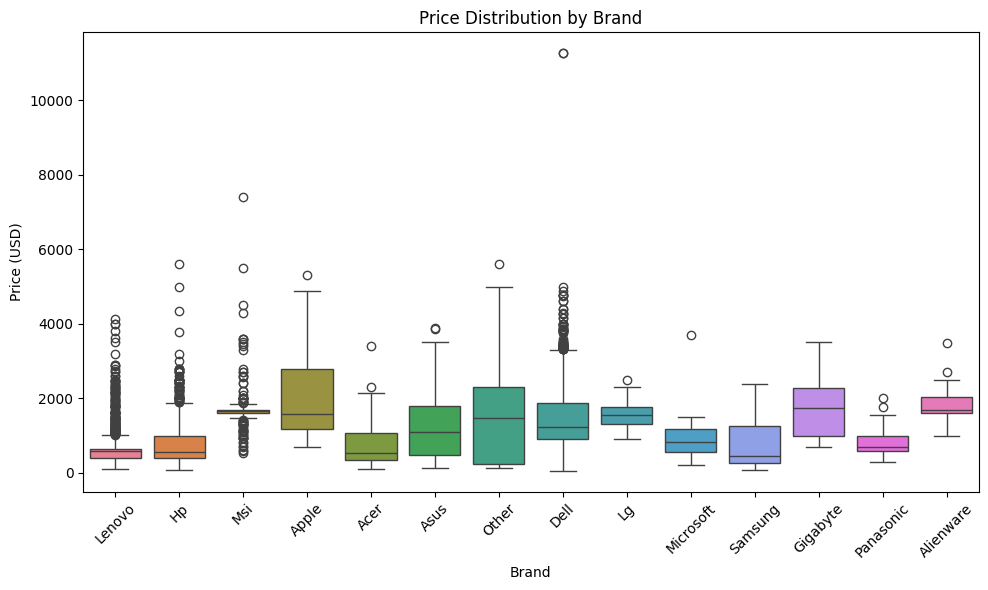

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='price_dollar', data=df, hue='brand')
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

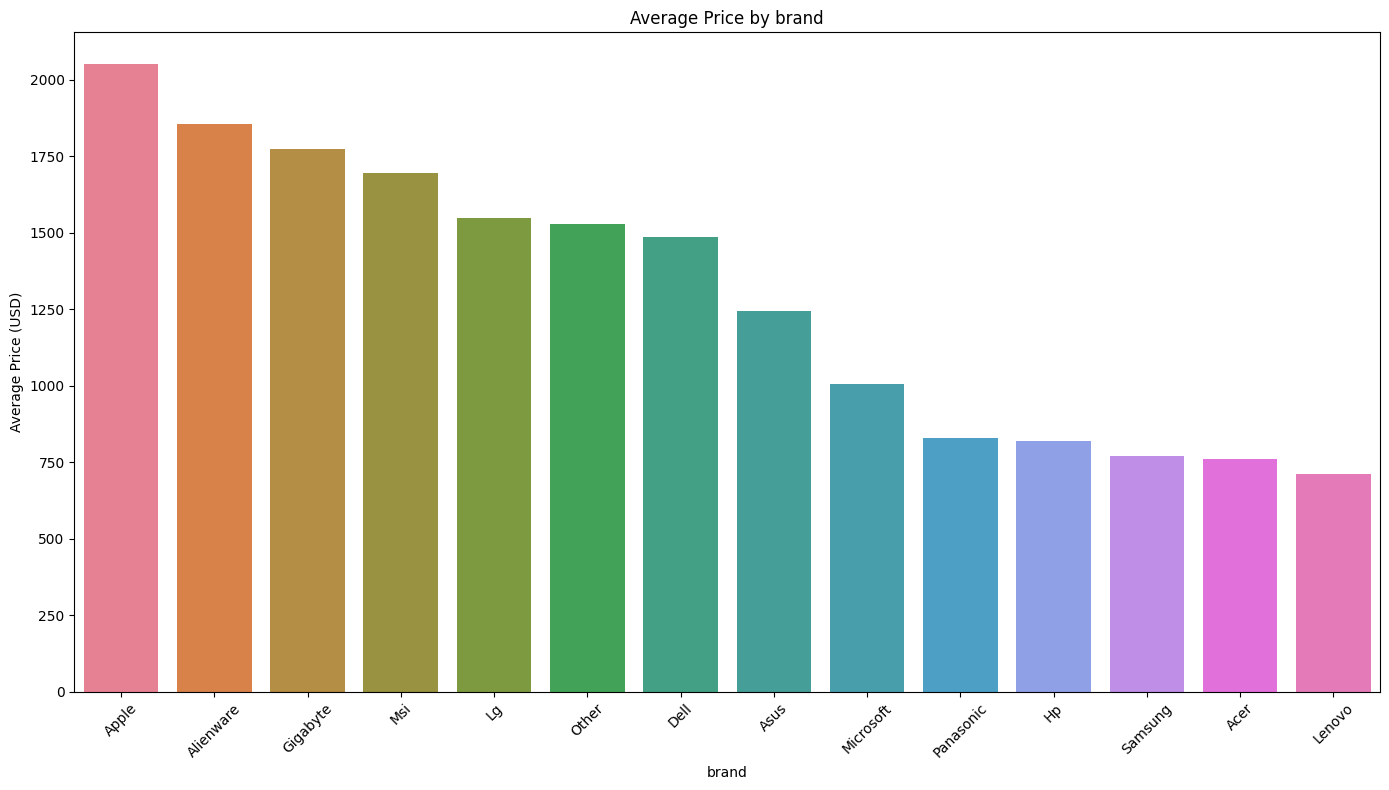

In [59]:
cpu_avg_price = df.groupby('brand')['price_dollar'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='brand', y='price_dollar', data=cpu_avg_price, hue='brand')
plt.title('Average Price by brand')
plt.xlabel('brand')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### `Average Price by CPU`

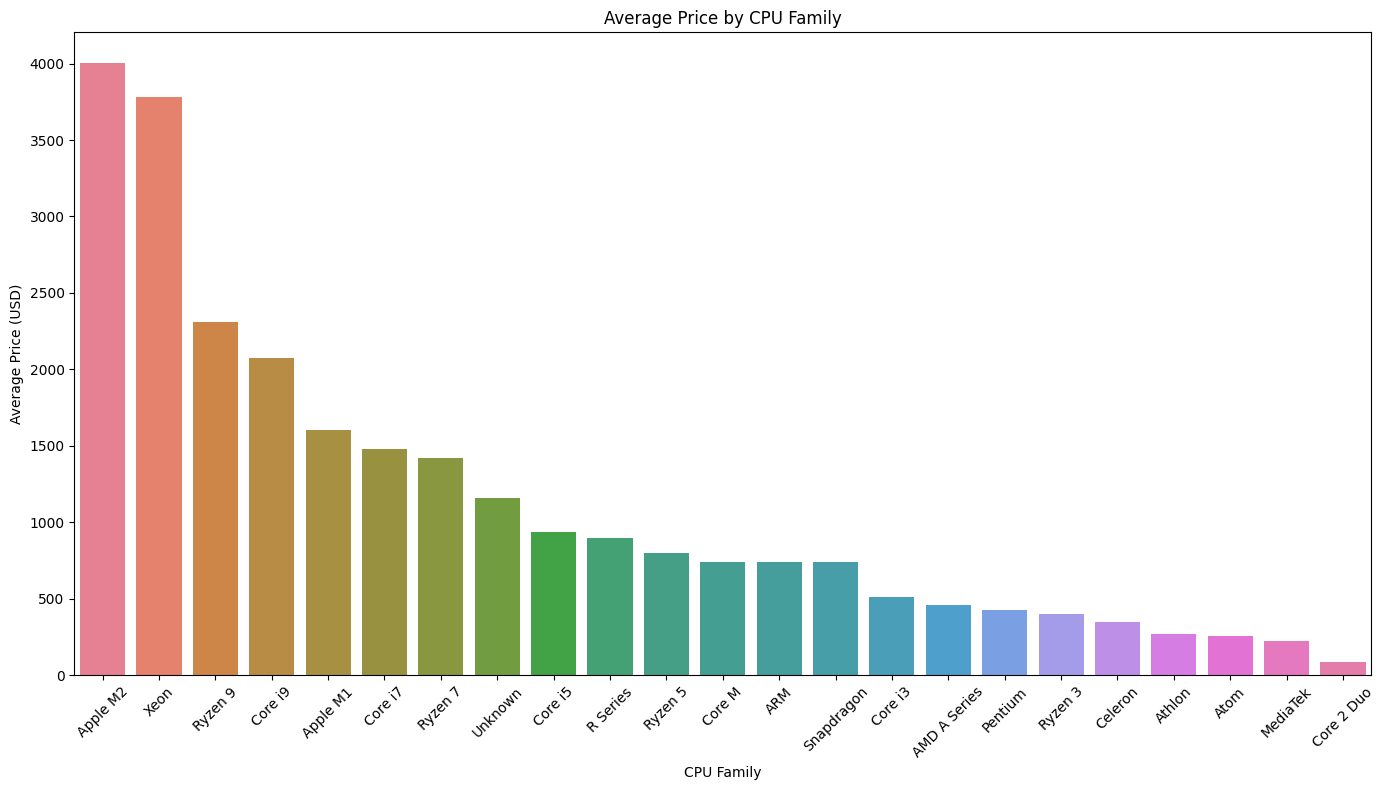

In [60]:
cpu_avg_price = df.groupby('cpu_family')['price_dollar'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='cpu_family', y='price_dollar', data=cpu_avg_price, hue='cpu_family')
plt.title('Average Price by CPU Family')
plt.xlabel('CPU Family')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

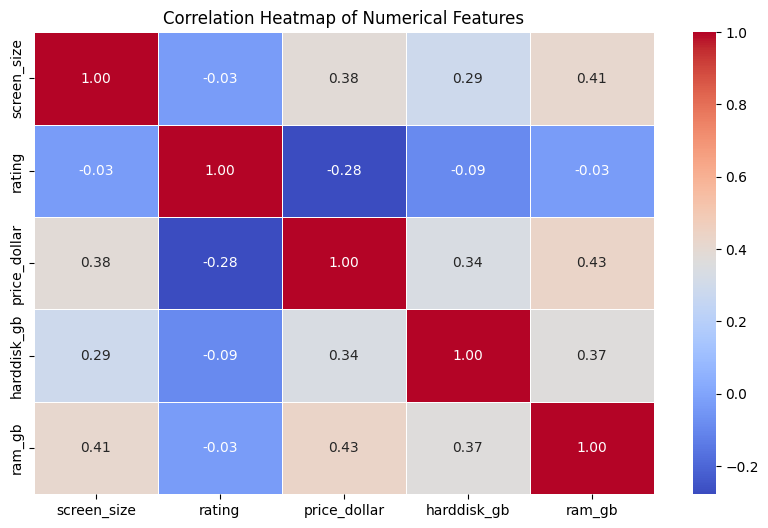

In [61]:
# Select only numeric columns
numeric_df = df[['screen_size', 'rating', 'price_dollar', 'harddisk_gb', 'ram_gb']]

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## `Feature Engineering`

### `Assigning CPU weights`

In [62]:
cpu_weights = {
    'Core i9': 10,
    'Ryzen 9': 9.5,
    'Core i7': 9,
    'Ryzen 7': 8.5,
    'Core i5': 8,
    'Ryzen 5': 7.5,
    'Core i3': 7,
    'Ryzen 3': 6.5,
    'Apple M2': 6,
    'Apple M1': 5.5,
    'Xeon': 5,
    'Core M': 4.5,
    'AMD A Series': 4,
    'Pentium': 3.5,
    'Athlon': 3,
    'Celeron': 2.5,
    'Atom': 2,
    'Core 2 Duo': 1.5,
    'ARM': 1,
    'Snapdragon': 1,
    'MediaTek': 1,
    'R Series': 1,
    'Unknown': 0,
    'Others': 0
}

df['cpu_weights'] = df['cpu_family'].map(cpu_weights).fillna(0)

### `Encoding Graphics Type`

In [63]:
graphics_type_map = {
    'Integrated': 0,
    'Dedicated': 2,
    'Unknown': 1,
    'Both': 2  # treating "Both" as performance equivalent to Dedicated
}

df['graphics_type_encoded'] = df['graphics_type'].map(graphics_type_map).fillna(2)

### `Encoding GPU Types`

In [64]:
def categorize_graphics(gpu):
    if pd.isnull(gpu) or gpu.lower() in ['unknown', 'shared', 'integrated']:
        return '0'
    
    gpu = gpu.lower()

    # High-end RTX and workstation GPUs
    high_keywords = ['rtx 4090', 'rtx 4080', 'rtx 4070', 'rtx 3080', 'rtx 3070', 'rtx a5000', 'rtx a4500', 'rtx a4000', 'a3000', 'quadro', 'a5500']
    if any(keyword in gpu for keyword in high_keywords):
        return '2'

    # Mid-range RTX/GTX GPUs
    mid_keywords = ['rtx 3060', 'rtx 3050', 'gtx 1650', 't1200', 'rtx a2000', 'mx550', 'mx450', 'mx350']
    if any(keyword in gpu for keyword in mid_keywords):
        return '1'

    # Low-end or integrated
    low_keywords = ['uhd', 'intel iris', 'intel xe', 'vega', 'radeon', 'integrated', 'intel hd', 'adreno']
    if any(keyword in gpu for keyword in low_keywords):
        return '0'

    return '0'

df['graphics_encoded'] = df['graphics'].apply(categorize_graphics)

### `Encoding brands based on Avg Price`

In [65]:
# average price by brand
brand_avg_price = df.groupby('brand')['price_dollar'].mean().sort_values()

# mapping where higher price = higher encoded value
brand_price_encoding = {brand: idx for idx, brand in enumerate(brand_avg_price.index)}
df['brand_encoded'] = df['brand'].map(brand_price_encoding)

print("Brand Encoding Based on Average Price:")
for brand, code in brand_price_encoding.items():
    print(f"{brand}: {code}")

Brand Encoding Based on Average Price:
Lenovo: 0
Acer: 1
Samsung: 2
Hp: 3
Panasonic: 4
Microsoft: 5
Asus: 6
Dell: 7
Other: 8
Lg: 9
Msi: 10
Gigabyte: 11
Alienware: 12
Apple: 13


### `Outlier Removal`

In [66]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    outlier_count = df.shape[0] - filtered_df.shape[0]
    
    print(f"Removed {outlier_count} outliers from '{column}'")
    return filtered_df

# Apply outlier removal
columns_to_clean = ['ram_gb', 'harddisk_gb', 'price_dollar']
for col in columns_to_clean:
    df = remove_outliers_iqr(df, col)

# Final shape after removing all selected outliers
print(f"\nFinal shape after outlier removal: {df.shape}")

Removed 507 outliers from 'ram_gb'
Removed 242 outliers from 'harddisk_gb'
Removed 42 outliers from 'price_dollar'

Final shape after outlier removal: (3650, 24)


### `Value For Money (VFM) Calculation: `

In [67]:
from sklearn.preprocessing import MinMaxScaler


df_scaled = df.copy()
performance_features = ['cpu_weights', 'ram_gb', 'graphics_encoded', 'harddisk_gb']
scaler = MinMaxScaler()
df_scaled[performance_features] = scaler.fit_transform(df[performance_features])

# Set weights
w_cpu = 0.4
w_ram = 0.25
w_gpu = 0.25
w_storage = 0.10

# Weighted performance score
df_scaled['performance_score'] = (
    (w_cpu * df_scaled['cpu_weights']) +
    (w_ram * df_scaled['ram_gb']) +
    (w_gpu * df_scaled['graphics_encoded'].astype(float)) +
    (w_storage * df_scaled['harddisk_gb'])
)


df_scaled['vfm_score'] = df_scaled['performance_score'] / df['price_dollar']
df_scaled['vfm_score'] = MinMaxScaler().fit_transform(df_scaled[['vfm_score']]) * 100

### `Correalation HeatMap`

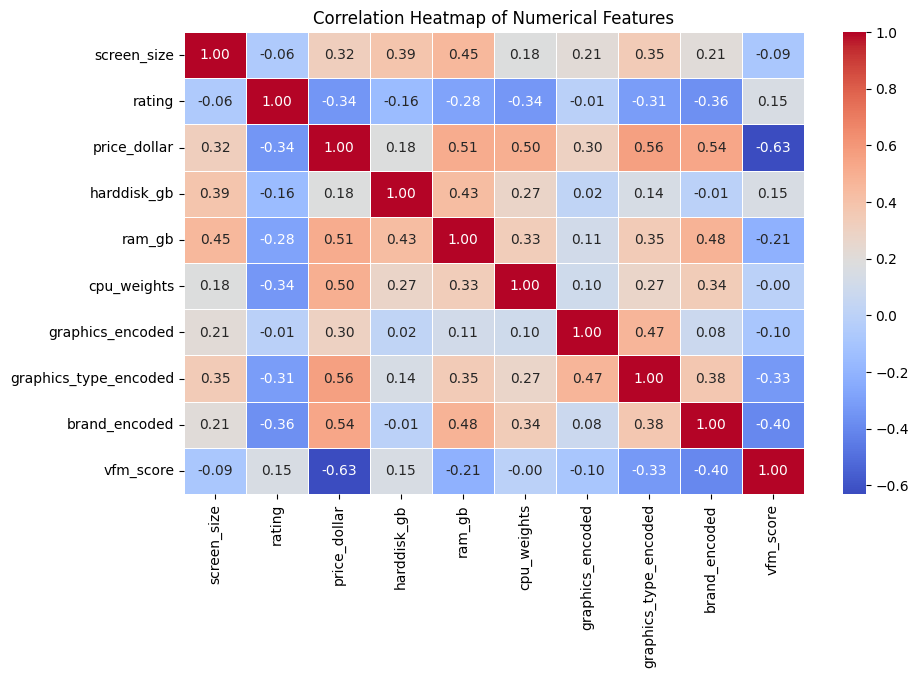

In [68]:
numeric_df = df_scaled[['screen_size', 'rating', 'price_dollar', 'harddisk_gb', 'ram_gb', 'cpu_weights', 'graphics_encoded', 'graphics_type_encoded', 'brand_encoded', 'vfm_score']]

corr = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# `Key Insights`

1. Target Variable: `vfm_score`
- Strongest negative correlation is with price_dollar (-0.63):
- As expected, higher price leads to lower value-for-money if not justified by performance.
- Negatively correlated with:
    - brand_encoded (-0.40): Expensive brands tend to offer lower VFM.
    - graphics_type_encoded (-0.33): Dedicated graphics usually increase price more than they boost VFM.
    - ram_gb (-0.21) and screen_size (-0.08): Higher RAM and screen size slightly reduce VFM unless price remains competitive.
- Slight positive correlation with rating (0.15): Well-rated laptops offer slightly better VFM on average.

2. `Price Analysis`
- price_dollar has:
    - Strong positive correlation with cpu_weights (0.50), ram_gb (0.51), and brand_encoded (0.54), indicating that high-end specs and premium brands significantly drive up price.
    - High correlation with graphics_type_encoded (0.56) shows that laptops with dedicated GPUs are usually pricier.

3. `CPU & GPU Importance`
- cpu_weights and graphics_encoded have positive but modest correlation with price and each other:
- Suggests that raw CPU/GPU values alone don’t dominate pricing — other brand/model/feature factors play a role.

4. `Feature Redundancy or Interaction`
- ram_gb, harddisk_gb, and graphics_type_encoded are moderately correlated, suggesting possible multi-collinearity — especially in pricing models.
- brand_encoded is fairly correlated with almost all price-related features, reinforcing that brand significantly impacts perceived value.

`Conclusion`
- The vfm_score behaves as intended: penalizing overpriced specs, rewarding balanced configurations.
- Most correlations align with domain expectations, confirming the robustness of feature engineering so far.

In [70]:
# Save to file
df_scaled.to_csv("cleaned_laptop_data.csv", index=False)

In [69]:
import nbformat
from nbconvert import PythonExporter

# Load the notebook
with open("Smart_Laptop_Buying.ipynb", "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Convert to .py format
exporter = PythonExporter()
source_code, _ = exporter.from_notebook_node(nb)

# Save to .py file
with open("output_script.py", "w", encoding="utf-8") as f:
    f.write(source_code)